In [1]:
import os 
import pandas as pd

import plotly.express as px
from IPython.display import HTML
from plotly.subplots import make_subplots
import plotly.graph_objects as go

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


ROOTDIR = os.path.dirname(os.getcwd())
DATADIR = os.path.join(ROOTDIR, 'data')

In [23]:
df = pd.read_parquet(os.path.join(DATADIR, 'clean.parquet'))

In [24]:
df.head()

,date,desc,cat,amount,merch,note,id,split,ym
0,2018-11-11 11:45:52,fgtofg,general,200.00,gunzinger,fgtofg,tx_00009cegw7obs9iqehznxb,None,2018-11-01
1,2018-11-11 11:52:40,p9811069,general,-200.00,fabian gunzinger,p9811069,tx_00009ceh7gjc93f2z8ej7z,None,2018-11-01
2,2018-11-18 16:19:23,waitrose london gbr,groceries,-2.99,waitrose & partners,None,tx_00009ctawup6crg1smr9ul,None,2018-11-01
3,2018-11-18 16:21:02,tesco stores 5103 hammersmith gbr,groceries,-5.05,tesco,None,tx_00009ctafeypofhtytdfab,None,2018-11-01
4,2018-11-19 05:35:02,tfl travel charge tfl.gov.uk/cp gbr,transport,-12.40,transport for london,"travel charge for monday, 19 nov",tx_00009cujx410rx7cf2wo0v,None,2018-11-01


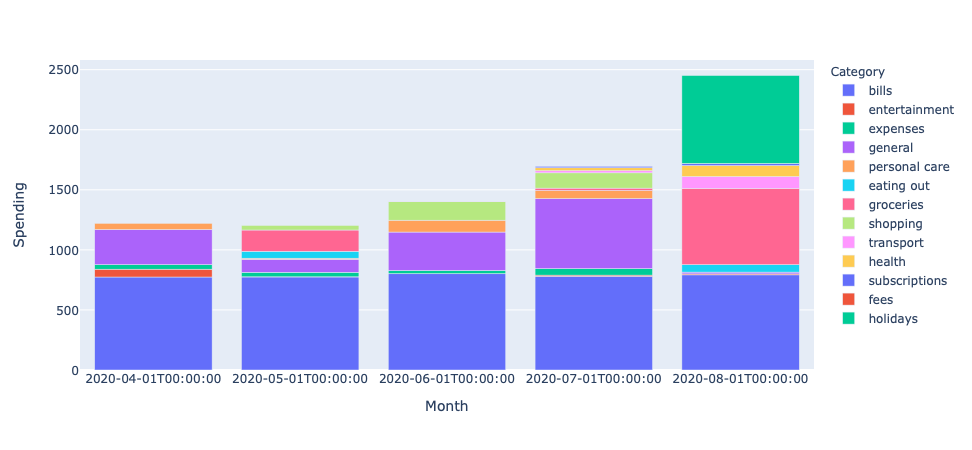

In [70]:
def make_credit_data(df):
    last5mnths = df.ym.drop_duplicates().nlargest(5)
    data = df[df.amount < 0].copy()
    data = data[data.ym.isin(last5mnths)]
    data['amount'] = data.amount * -1
    return data

def drop_transfers(df):
    transfers = (
        (df.cat.eq('transfer')) |
        (df.merch.str.contains(' pot', na=False))
    )
    return df[~transfers]


cred = (
    make_credit_data(df)
    .pipe(drop_transfers)
)

def group_spending(df):    
    g = df.groupby(['ym', 'cat'])
    fig = (
        px.bar(
            x=g.ym.first(),
            y=g.amount.sum(),
            color=g.cat.first()
        )
        .update_layout(
            xaxis_title='Month',
            yaxis_title='Spending',
            xaxis_type='category',
            legend_title_text='Category'
#             plot_bgcolor=colors['background'],
#             paper_bgcolor=colors['background'],
#             font_color=colors['text']
        )
    )
    return fig

group_spending(cred)

In [61]:
g = df.groupby(['ym', 'cat'])

g.ym.first()

# .agg({'ym': ['first'], 'amount': 'sum'})

ym          cat          
2018-11-01  eating out      2018-11-01
            general         2018-11-01
            groceries       2018-11-01
            holidays        2018-11-01
            shopping        2018-11-01
            transport       2018-11-01
2018-12-01  bills           2018-12-01
            eating out      2018-12-01
            entertainment   2018-12-01
            expenses        2018-12-01
            finances        2018-12-01
            general         2018-12-01
            groceries       2018-12-01
            holidays        2018-12-01
            shopping        2018-12-01
            transport       2018-12-01
2019-01-01  bills           2019-01-01
            eating out      2019-01-01
            entertainment   2019-01-01
            expenses        2019-01-01
            finances        2019-01-01
            general         2019-01-01
            groceries       2019-01-01
            holidays        2019-01-01
            personal care   2019-01-01

# Resources

- Using Plotly for Jupyter Lab and Fastpages ([link](https://colab.research.google.com/github/binnisb/blog/blob/master/_notebooks/2020-04-02-Plotly-in-lab.ipynb#scrollTo=TWW5ogvQPEk1))